# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15


2197/2197 [==============================] - 88s 38ms/step - loss: 1.3723 - accuracy: 0.5977 - val_loss: 0.5392 - val_accuracy: 0.8288
Epoch 2/15
2197/2197 [==============================] - 84s 38ms/step - loss: 0.4628 - accuracy: 0.8532 - val_loss: 0.3028 - val_accuracy: 0.9037
Epoch 3/15
2197/2197 [==============================] - 84s 38ms/step - loss: 0.2770 - accuracy: 0.9111 - val_loss: 0.2382 - val_accuracy: 0.9239
Epoch 4/15
2197/2197 [==============================] - 84s 38ms/step - loss: 0.1901 - accuracy: 0.9376 - val_loss: 0.2332 - val_accuracy: 0.9258
Epoch 5/15
2197/2197 [==============================] - 85s 38ms/step - loss: 0.1401 - accuracy: 0.9535 - val_loss: 0.2046 - val_accuracy: 0.9341
Epoch 6/15
2197/2197 [==============================] - 85s 39ms/step - loss: 0.1115 - accuracy: 0.9638 - val_loss: 0.2108 - val_accuracy: 0.9404
Epoch 7/15
2197/2197 [==============================] - 84s 38ms/step - loss: 0.0923 - accuracy: 0.9698 - val_loss: 0.1564 - val_accura

## Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

   1/2197 [..............................] - ETA: 2:10 - loss: 0.0031 - accuracy: 1.0000

2197/2197 [==============================] - 28s 13ms/step - loss: 0.0145 - accuracy: 0.9953
Training accuracy: 0.9953197240829468


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

  1/550 [..............................] - ETA: 20s - loss: 0.0530 - accuracy: 0.9688

550/550 [==============================] - 7s 13ms/step - loss: 0.1196 - accuracy: 0.9692
Validation accuracy: 0.969155490398407


### Saving Model

In [20]:
cnn.save('trained_plant_disease_model_CNN.keras')

In [21]:
training_history.history #Return Dictionary of history

{'loss': [1.3723076581954956,
  0.46277913451194763,
  0.2769717574119568,
  0.19014747440814972,
  0.1401144564151764,
  0.11145788431167603,
  0.09226793050765991,
  0.07892849296331406,
  0.06434400379657745,
  0.06002762168645859,
  0.0523480623960495,
  0.04528484120965004,
  0.04673904553055763,
  0.03784464672207832,
  0.037410348653793335],
 'accuracy': [0.5976527333259583,
  0.8532185554504395,
  0.9110890030860901,
  0.9376342296600342,
  0.9534533023834229,
  0.9638381004333496,
  0.9697702527046204,
  0.9743794202804565,
  0.9790738821029663,
  0.9806814193725586,
  0.9832562804222107,
  0.9851767420768738,
  0.9850202798843384,
  0.9883206486701965,
  0.9881072640419006],
 'val_loss': [0.5391862392425537,
  0.30279088020324707,
  0.23822656273841858,
  0.23315557837486267,
  0.2046174854040146,
  0.21079066395759583,
  0.15639619529247284,
  0.21095077693462372,
  0.16472581028938293,
  0.13372841477394104,
  0.15136446058750153,
  0.12801553308963776,
  0.1791793256998062

In [22]:
import json


In [23]:
#Recording History in json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Load model

In [25]:
model = tf.keras.models.load_model('Trained_plant_disease_model_CNN.keras')


In [26]:
with open('training_hist.json', 'r') as f:
    history = json.load(f)

## Accuracy Visualization

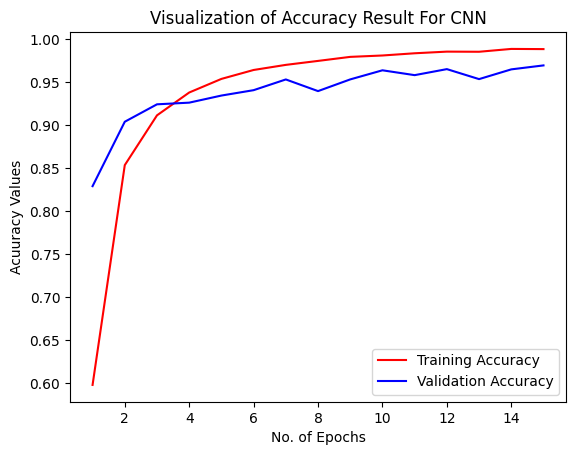

In [27]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Acuuracy Values')
plt.title('Visualization of Accuracy Result For CNN')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [28]:
class_name = validation_set.class_names

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 28s 2ms/step


In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

### NEW imports for model report

In [34]:
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

In [35]:
cm = confusion_matrix(Y_true,predicted_categories)
report_df = classification_report(Y_true,predicted_categories,target_names=class_name,output_dict=True)
report_df = pd.DataFrame(report_df).transpose()
report_df = report_df.iloc[:-3, :]

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.92      0.99      0.95       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.98      0.

## DATA VISUAlisation

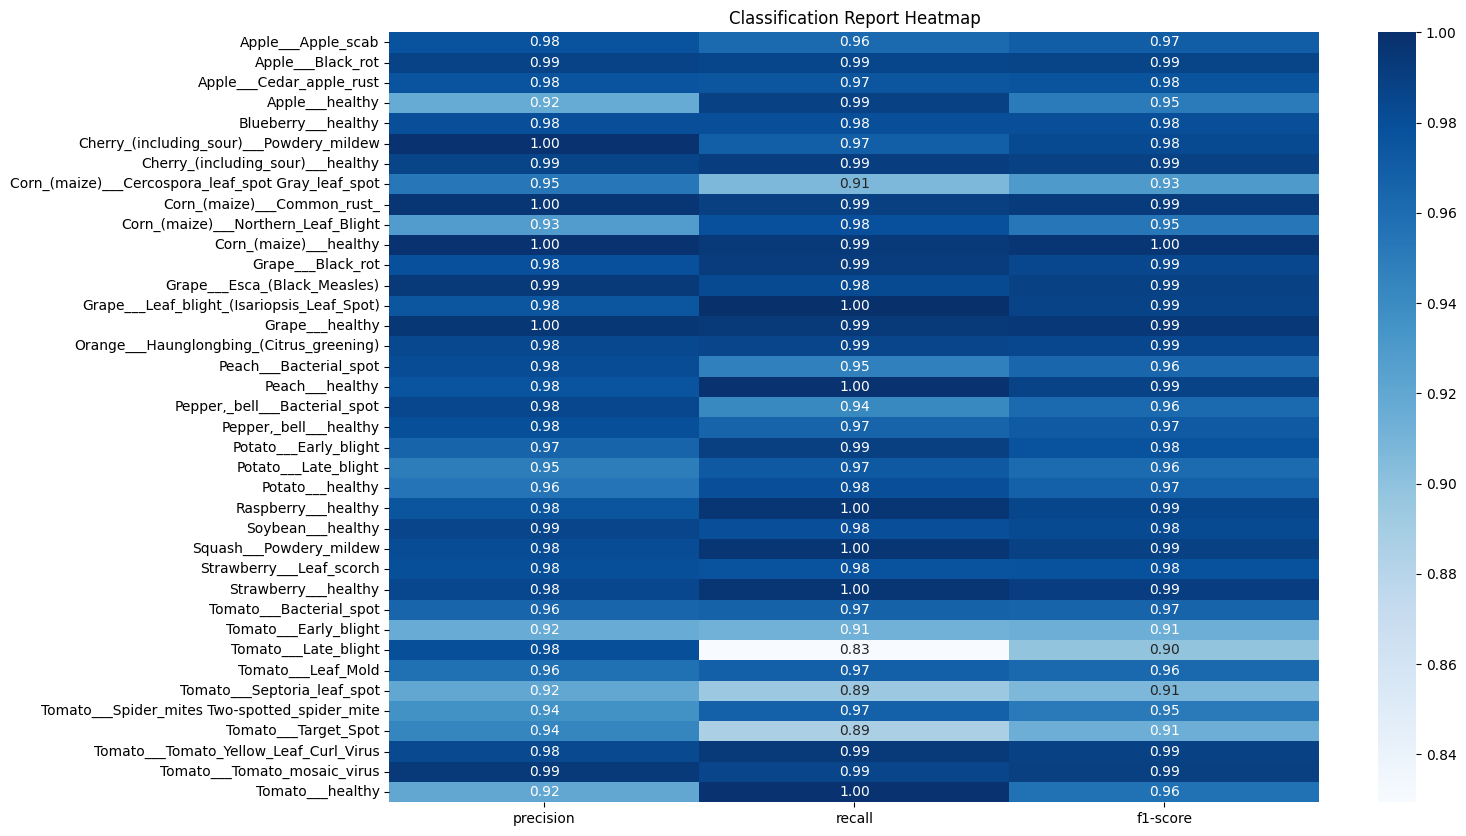

In [37]:

plt.figure(figsize=(15,10))
sns.heatmap(report_df[['precision','recall','f1-score']], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

### Precision plot

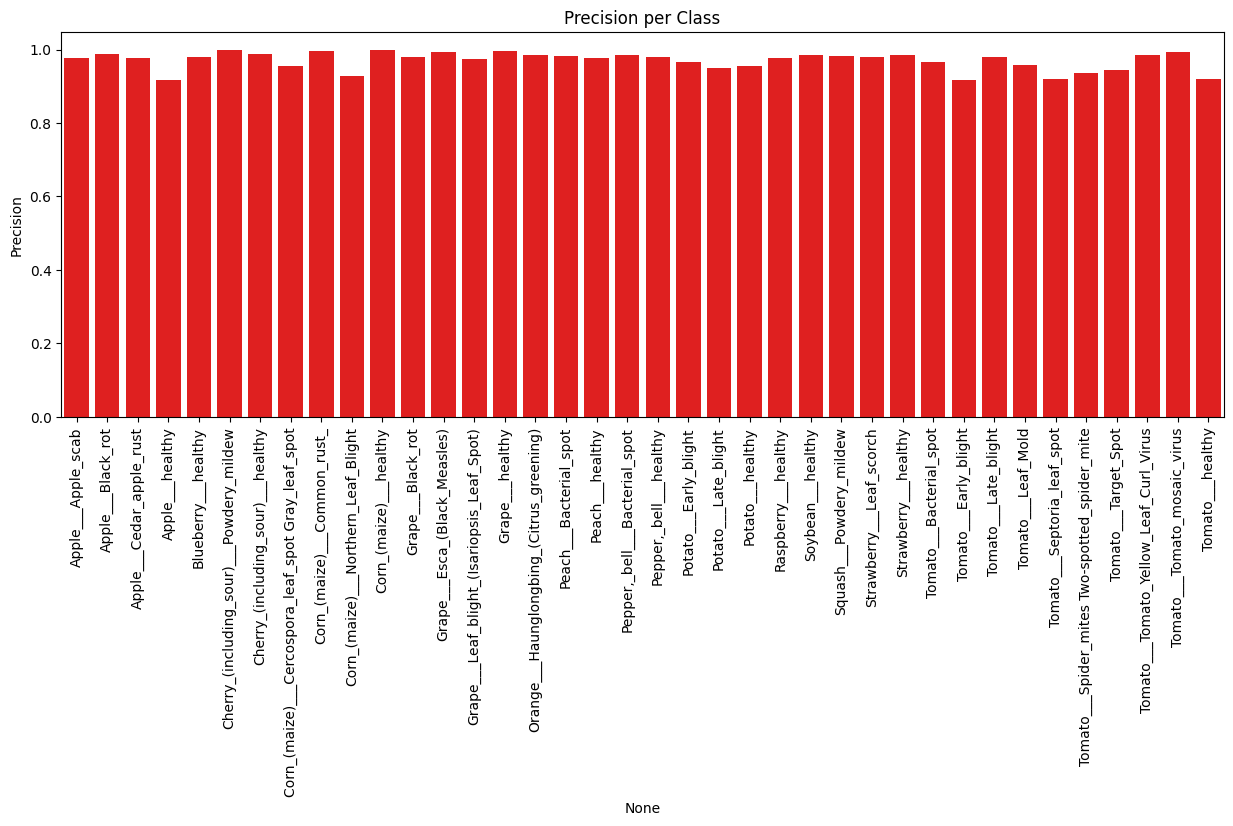

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x=report_df.index, y=report_df['precision'], color='red')
plt.xticks(rotation=90)
plt.ylabel('Precision')
plt.title('Precision per Class')
plt.show()


### Recall Plot

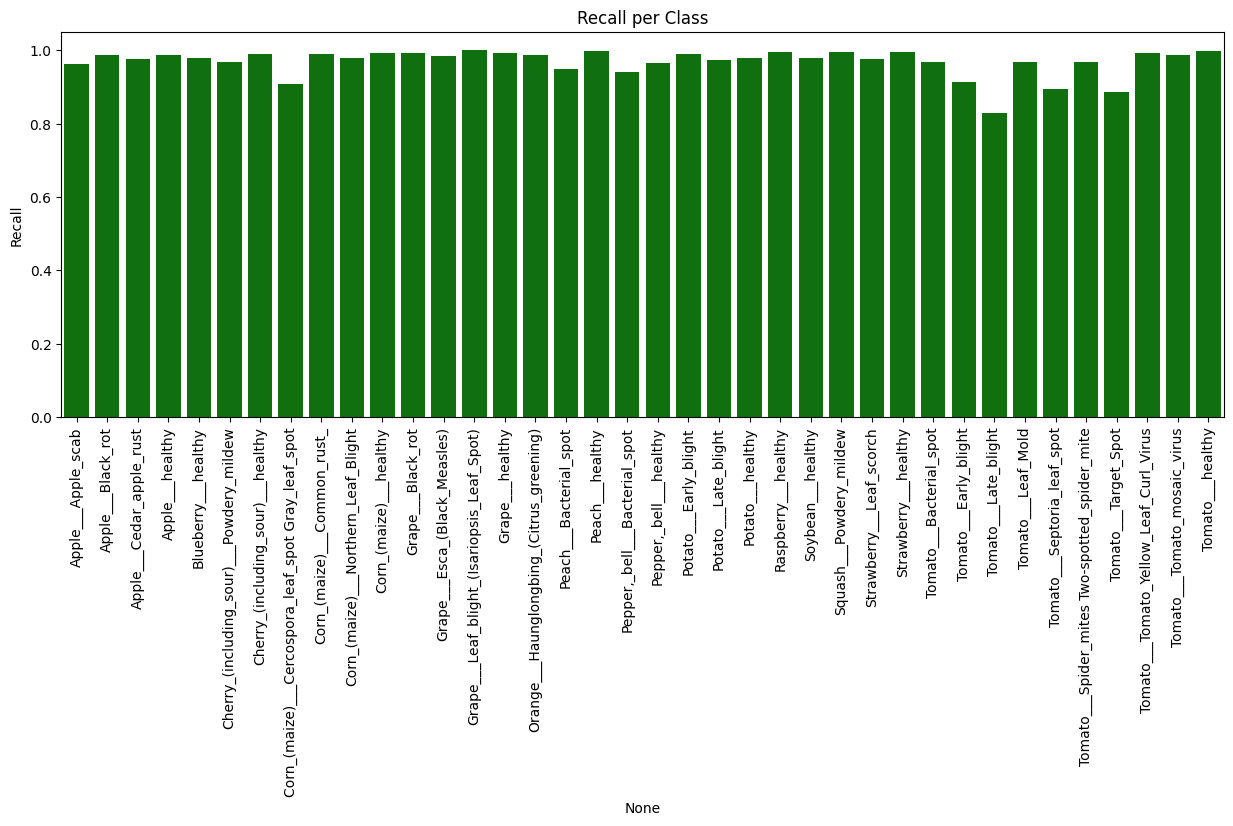

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x=report_df.index, y=report_df['recall'], color='green')
plt.xticks(rotation=90)
plt.ylabel('Recall')
plt.title('Recall per Class')
plt.show()


### F1-Score plot

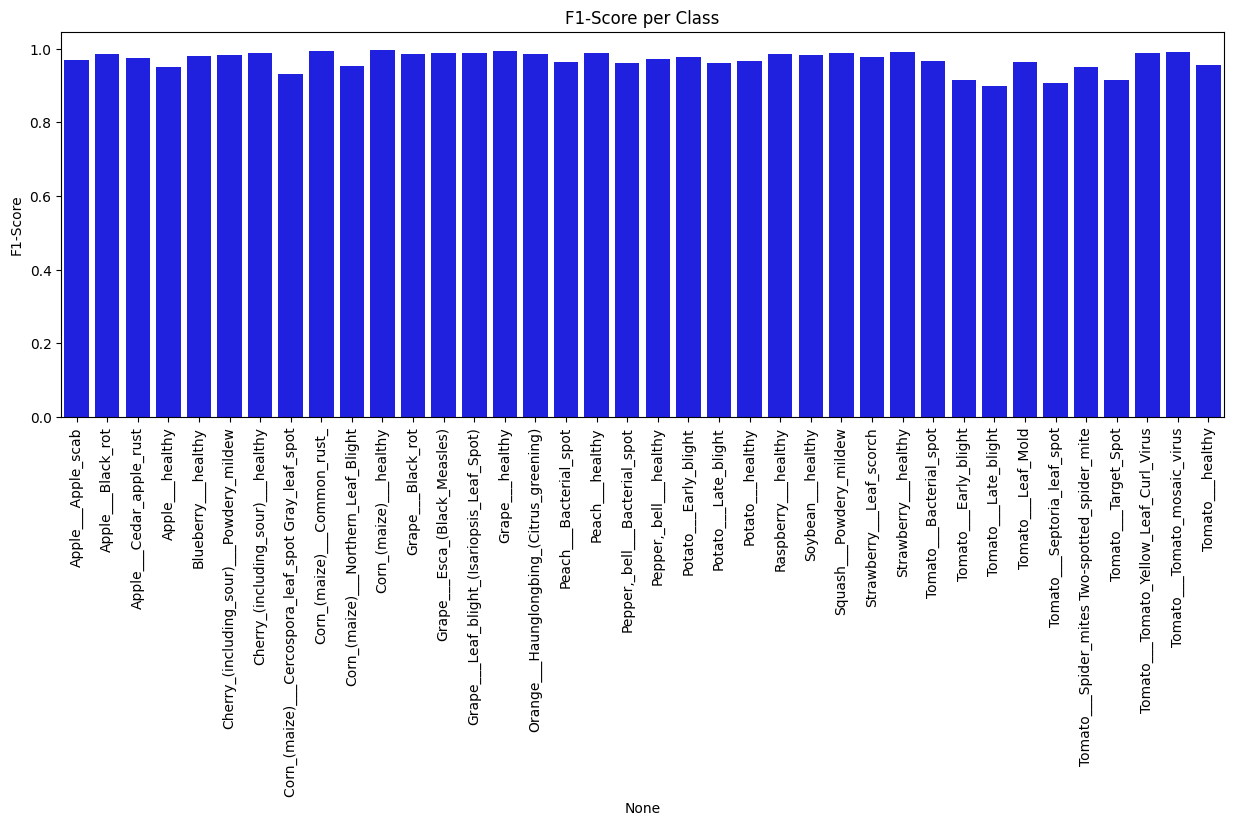

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x=report_df.index, y=report_df['f1-score'], color='blue')
plt.xticks(rotation=90)
plt.ylabel('F1-Score')
plt.title('F1-Score per Class')
plt.show()


### Confusion Matrix Visualization

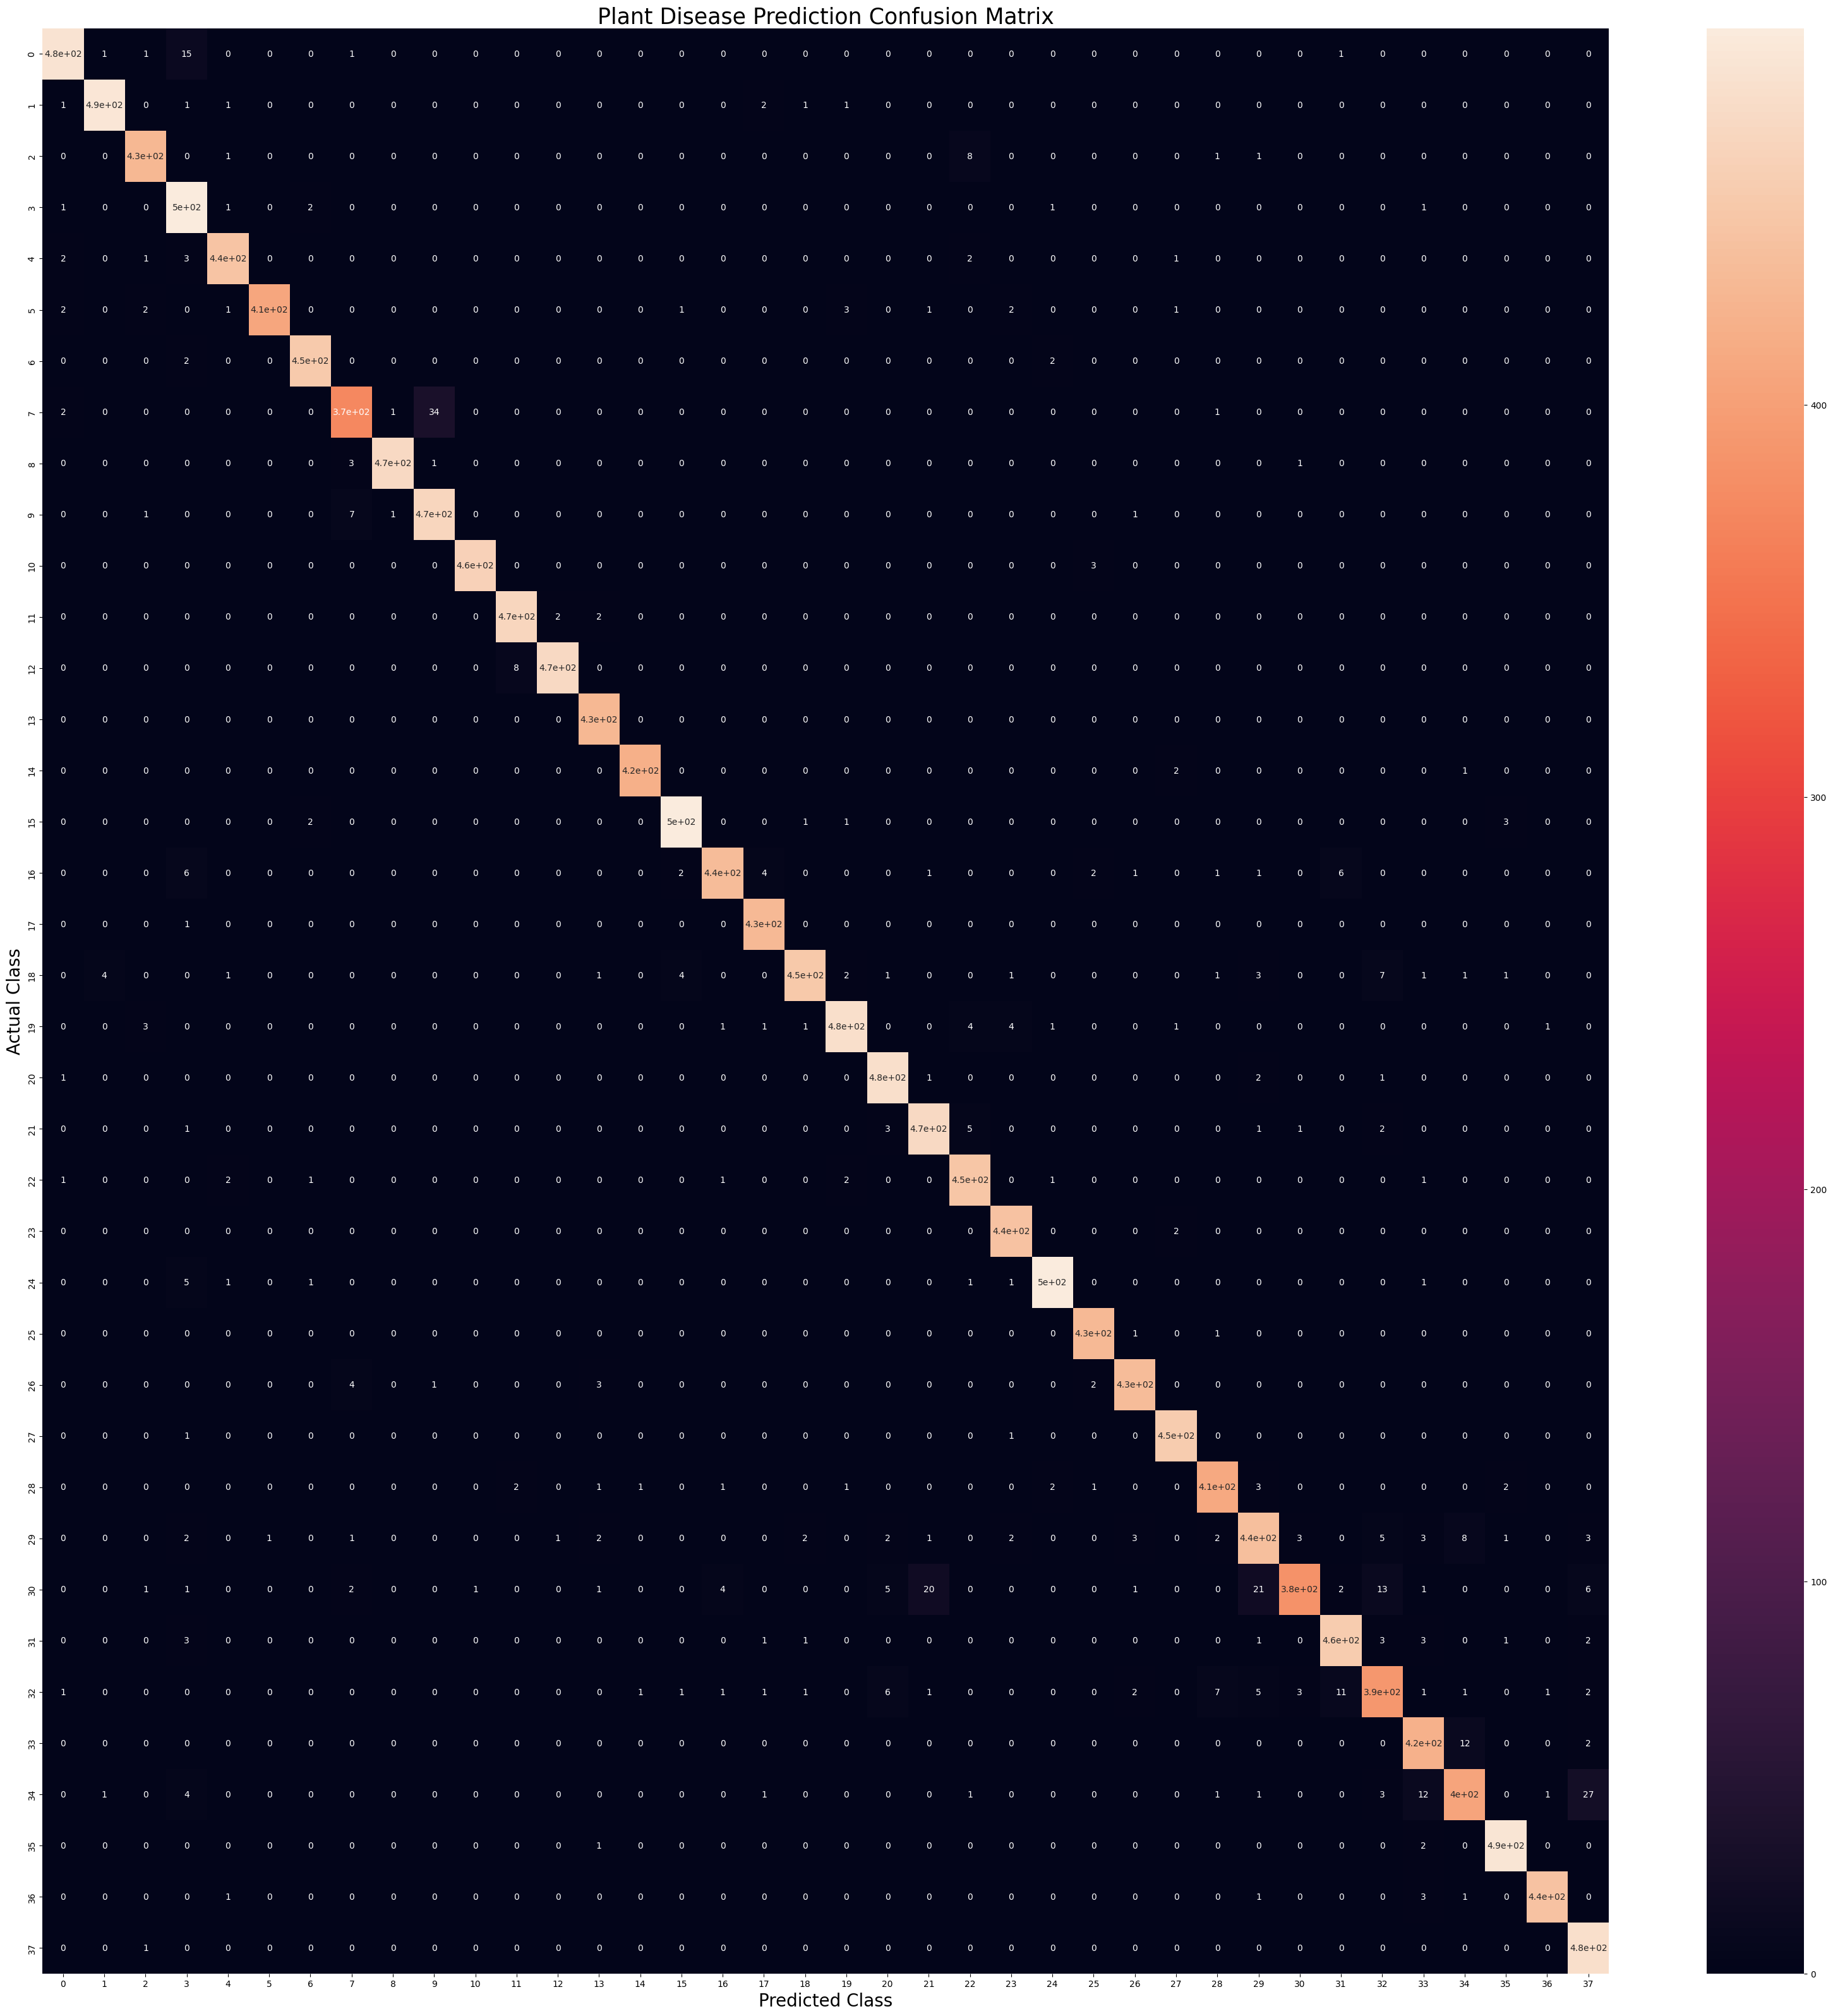

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

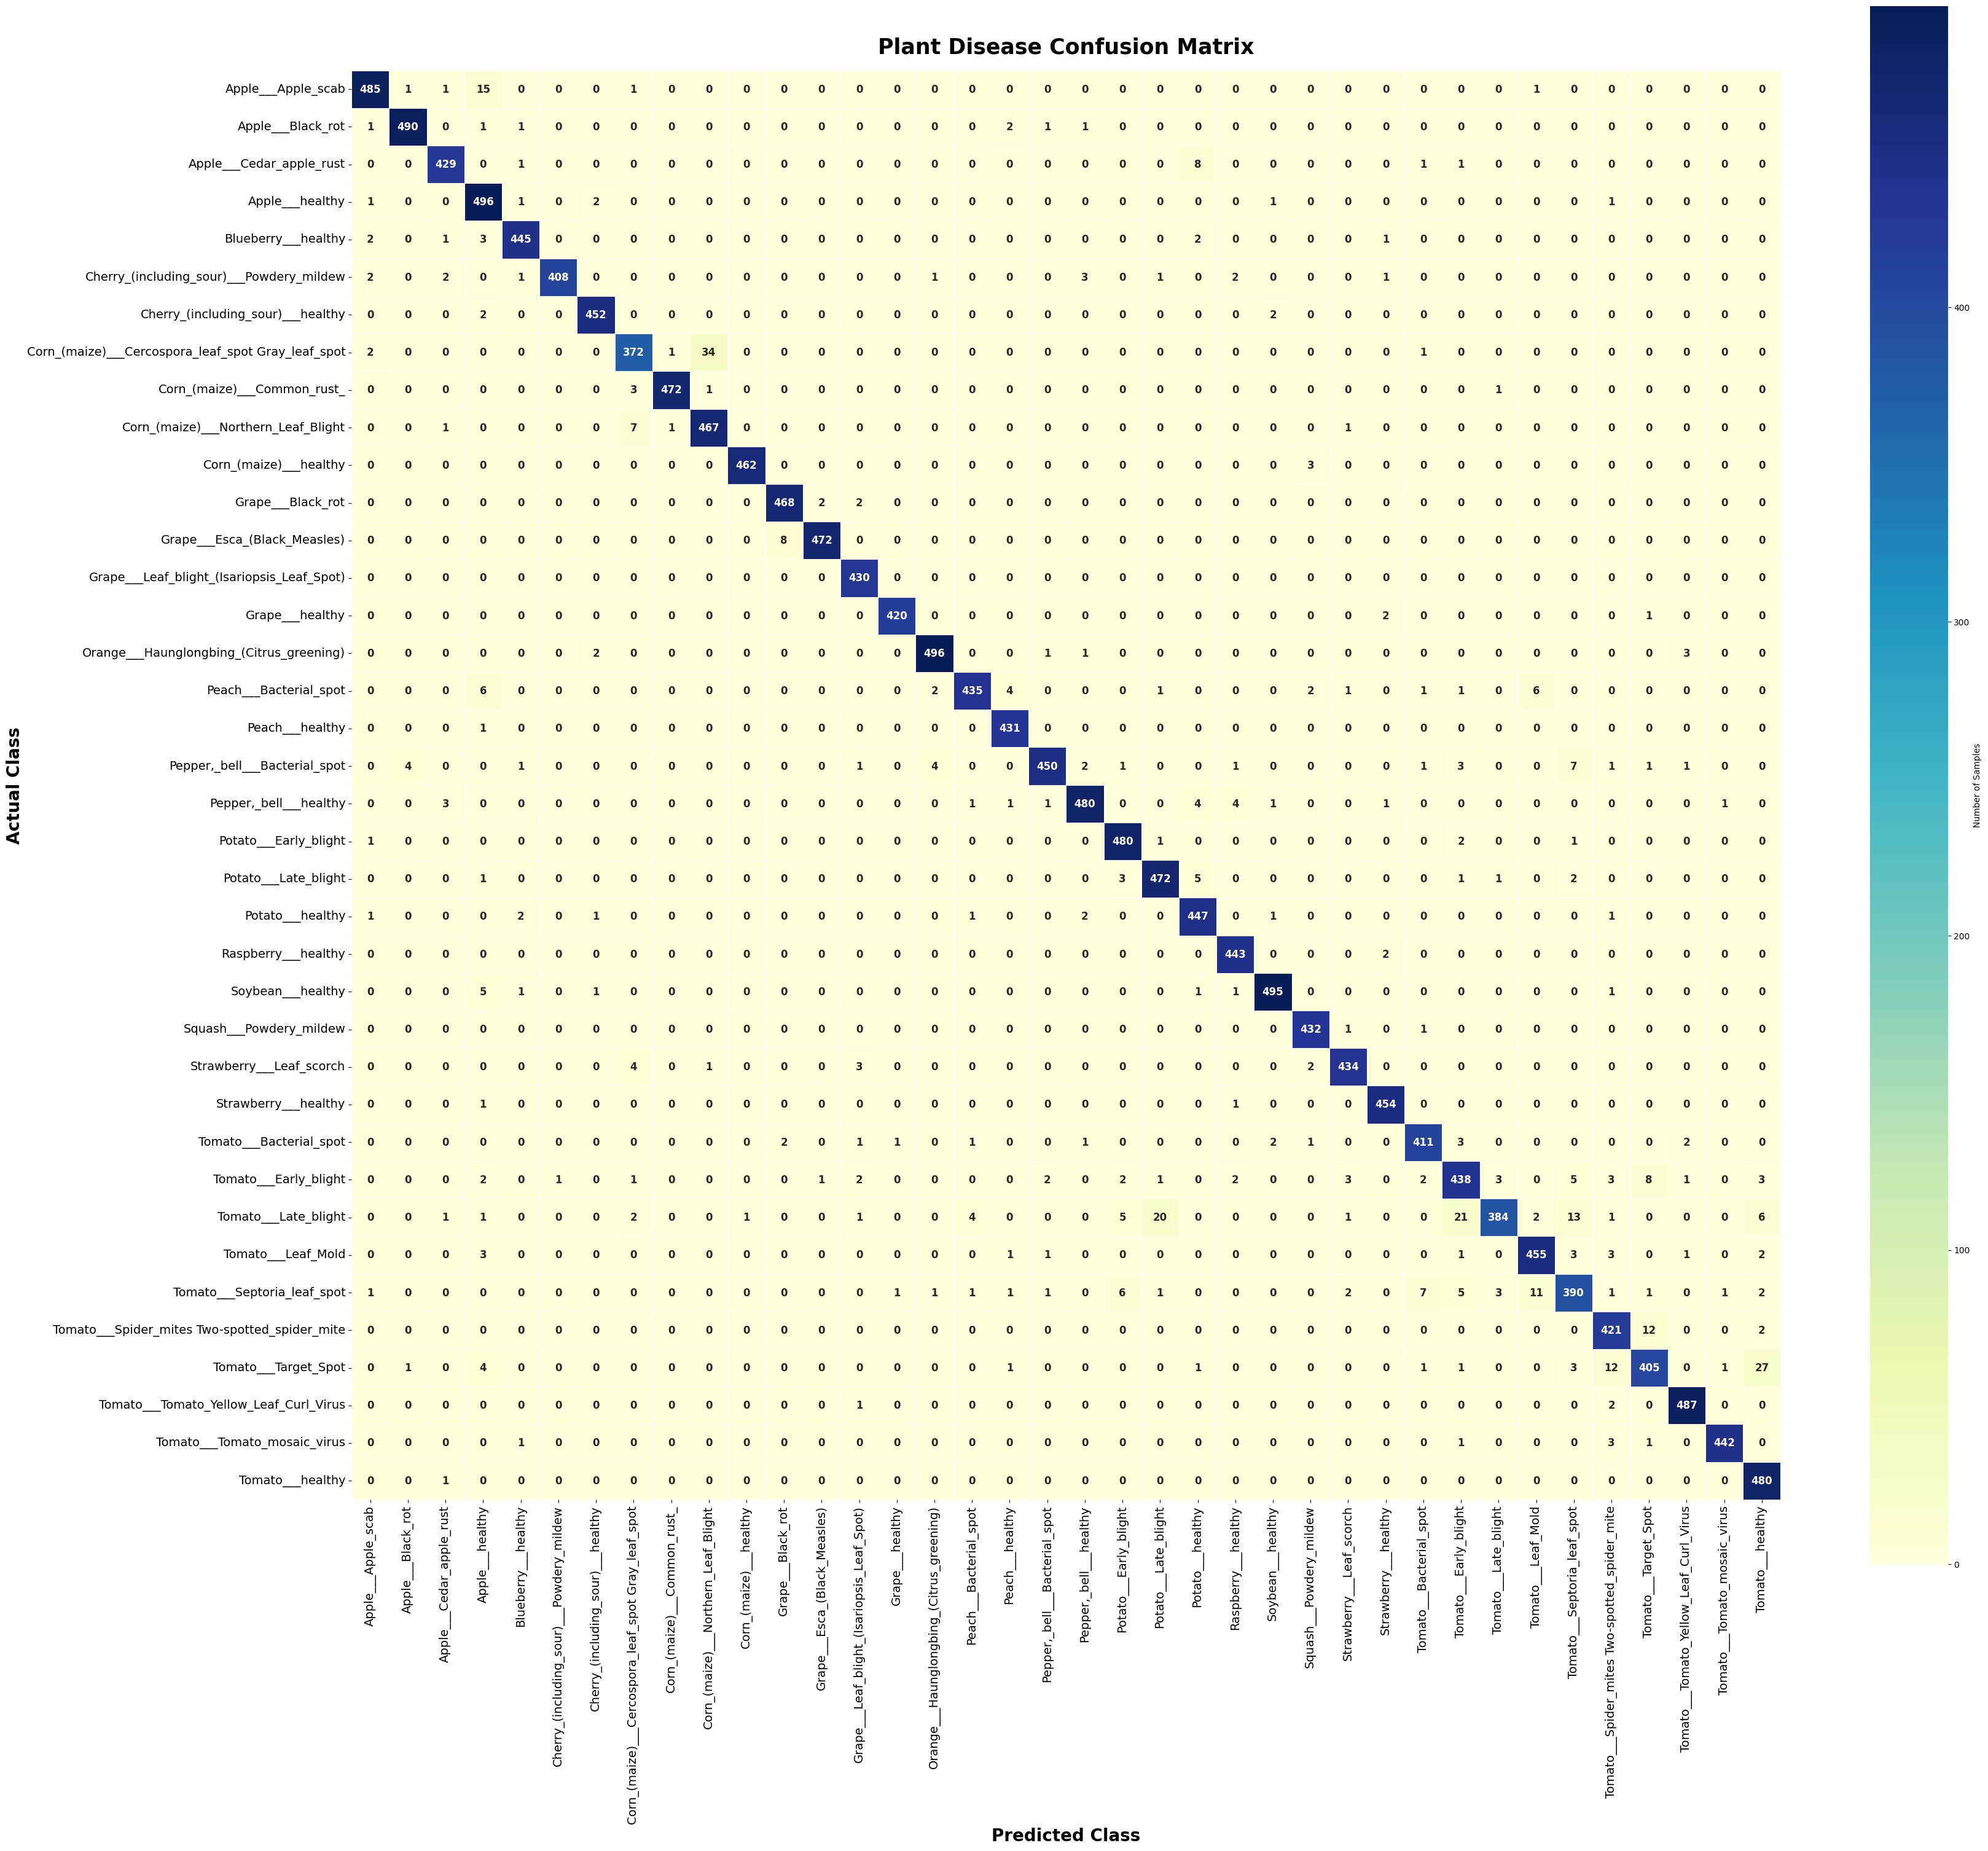

In [42]:
plt.figure(figsize=(35, 35))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='YlGnBu',       # beautiful gradient color
    linewidths=0.5,      # thin lines between cells
    linecolor='white',   # white lines for separation
    square=True,         # squares instead of rectangles
    cbar_kws={"shrink": 0.8, 'label': 'Number of Samples'},  # colorbar styling
    annot_kws={"size": 12, "weight": "bold"}  # font inside boxes
)

plt.xticks(ticks=np.arange(len(class_name)) + 0.5, labels=class_name, rotation=90, fontsize=14)
plt.yticks(ticks=np.arange(len(class_name)) + 0.5, labels=class_name, rotation=0, fontsize=14)

plt.xlabel('Predicted Class', fontsize=20, weight='bold')
plt.ylabel('Actual Class', fontsize=20, weight='bold')
plt.title('Plant Disease Confusion Matrix', fontsize=25, weight='bold', pad=20)

plt.tight_layout()
plt.show()
